In [24]:
# import csv
from operator import itemgetter
import numpy as np
import pandas as pd
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


# from datetime import datetime

file5 = open('201811291521.txt', 'r')
dataset = file5.read()
print('data read')
dataset = dataset.split('\n')
data = []
for i in range(0, len(dataset)):
    data.append(dataset[i].split('|'))
data = sorted(data, key=itemgetter(0))
data.pop(0)
print('data sorted')

headings = ['stime', 'etime', 'sip', 'sport', 'sipint', 'mac', 'osname', 'osversion', 'fingerprint', 'dip', 'dport', 'dipint', 'dstmac', 'rosname', 'rosversion', 'rfingerprint', 'protocol', 'pkts', 'bytes', 'rpkts', 'rbytes', 'dur', 'iflags', 'riflags', 'uflags', 'ruflags', 'entropy', 'rentropy', 'tos', 'rtos', 'application', 'vlanint', 'domain', 'endreason', 'hash']
print('data : '+str(len(data)))
# for item in data:
#     item[0] = datetime.strptime(item[0], '%Y-%m-%d %H:%M:%S.%f')
#     item[1] = datetime.strptime(item[1], '%Y-%m-%d %H:%M:%S.%f')
#     print(item[0].strftime('%m/%d/%Y'))

data = np.array(data)
df = pd.DataFrame(data)
df.columns = headings
print('dataset created')
print(df.head())
edited_df = df.drop(['stime','etime','sipint','mac','osname','osversion','fingerprint','dipint','dstmac','rosname','rosversion','rfingerprint','iflags','riflags','uflags','ruflags','entropy','rentropy','tos','rtos','application','vlanint','domain','hash','pkts','bytes','rpkts','rbytes','dur','endreason'],axis=1)
print(edited_df.head())
# Get one hot encoding of columns B
one_hot = pd.get_dummies(edited_df['protocol'])
# Drop column B as it is now encoded
edited_df = edited_df.drop('protocol',axis = 1)
headers = []
for i in one_hot.columns:
    headers.append('protocol_' + i)
# Join the encoded df

one_hot.columns = headers
# edited_df = edited_df.join(one_hot)

def correct_ip(s):
    o = ''
    if '.' in s:
        for part in s.split('.'):
            part = part.zfill(3)
            o += part 
    else:
        o = o.zfill(12)
    o = o[:3] + '.' + o[3:]
    o = o[:7] + '.' + o[7:]
    o = o[:11] + '.' + o[11:]
    return o

def correct_port(s):
    return(s.zfill(5))
        


sip_headers = []
dip_headers = []

for i in range(4):
    sip_headers.append('sip_'+str(i))
    dip_headers.append('dip_'+str(i))

sip = []
for ip in edited_df['sip']:
    sip.append(map(int,correct_ip(ip).split('.')))
#     sip.append(correct_ip(ip).split('.'))

dip = []
for ip in edited_df['dip']:
    dip.append(map(int,correct_ip(ip).split('.')))
#     dip.append(correct_ip(ip).split('.'))


        
sport = []
for port in edited_df['sport']:
    sport.append(int(port))
    
dport = []
for port in edited_df['dport']:
    dport.append(int(port))
# print(len(sip[0]))
# print(len(dip[0]))
# print(len(dport[0]))
# print(len(sport[0]))
8
sip_df = pd.DataFrame(sip,columns=sip_headers)
dip_df = pd.DataFrame(dip,columns=dip_headers)
sport_df = pd.DataFrame(sport,columns=['sport'])
dport_df = pd.DataFrame(sport,columns=['dport'])


result = pd.concat([sip_df, dip_df, sport_df, dport_df, one_hot], axis=1, sort=False)
result.head()

# print(df['protocol'].nunique())

data read
data sorted
data : 213446
dataset created
                     stime                    etime             sip  sport  \
0  2017-05-09 10:36:34.876  2017-05-09 11:05:37.894  192.168.80.102   5353   
1  2017-05-09 10:38:11.077  2017-05-09 11:06:13.402  192.168.110.60  34056   
2  2017-05-09 10:38:11.077  2017-05-09 11:06:13.402  192.168.110.60  34056   
3  2017-05-09 10:38:11.077  2017-05-09 11:06:13.402  192.168.110.60  34056   
4  2017-05-09 10:38:11.078  2017-05-09 11:06:13.402  192.168.110.60  34056   

       sipint                 mac osname osversion fingerprint  \
0  3232256102  20:cf:30:8b:6f:17:                                
1  3232263740  00:26:18:f0:62:08:                                
2  3232263740  00:26:18:f0:62:08:                                
3  3232263740  00:26:18:f0:62:08:                                
4  3232263740  00:26:18:f0:62:08:                                

               dip     ...     ruflags entropy rentropy tos rtos application  \
0 

,sip_0,sip_1,sip_2,sip_3,dip_0,dip_1,dip_2,dip_3,sport,dport,protocol_1,protocol_139,protocol_17,protocol_2,protocol_41,protocol_47,protocol_6
0,192,168,80,102,224,0,0,251,5353,5353,0,0,1,0,0,0,0
1,192,168,110,60,171,122,234,240,34056,34056,0,0,1,0,0,0,0
2,192,168,110,60,182,132,115,102,34056,34056,0,0,1,0,0,0,0
3,192,168,110,60,182,40,209,121,34056,34056,0,0,1,0,0,0,0
4,192,168,110,60,124,232,60,77,34056,34056,0,0,1,0,0,0,0


(170756, 17) (42690, 17)
Running Fold 1 / 10
Train on 153681 samples, validate on 17075 samples
Epoch 1/10
153681/153681 [==============================] - 8s 52us/step - loss: 14163804199.2726 - acc: 0.9776 - val_loss: 14115457608.8944 - val_acc: 0.9807
Epoch 2/10
153681/153681 [==============================] - 4s 25us/step - loss: 13842450330.2803 - acc: 0.9807 - val_loss: 14115457608.8944 - val_acc: 0.9807
Epoch 3/10
153681/153681 [==============================] - 4s 25us/step - loss: 13910534590.8910 - acc: 0.9807 - val_loss: 14115457585.8657 - val_acc: 0.9807
Epoch 4/10
153681/153681 [==============================] - 4s 25us/step - loss: 13793882728.5948 - acc: 0.9807 - val_loss: 14115457601.2182 - val_acc: 0.9807
Epoch 5/10
153681/153681 [==============================] - 4s 25us/step - loss: 14035187739.3056 - acc: 0.9791 - val_loss: 14115457608.8944 - val_acc: 0.9807
Epoch 6/10
153681/153681 [==============================] - 4s 25us/step - loss: 13867182420.9002 - acc: 0.98

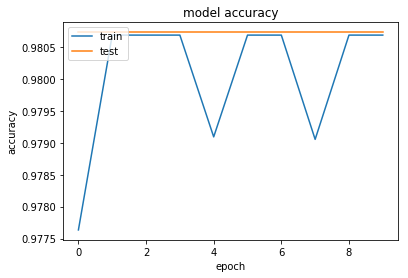

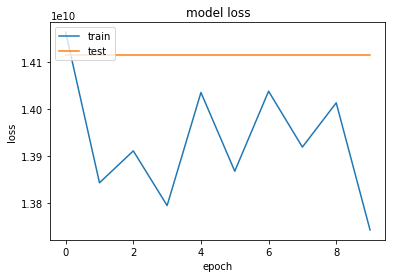

Running Fold 2 / 10
Train on 153681 samples, validate on 17075 samples
Epoch 1/10
153681/153681 [==============================] - 4s 25us/step - loss: 13906024390.7202 - acc: 0.9808 - val_loss: 14521429526.8788 - val_acc: 0.9800
Epoch 2/10
153681/153681 [==============================] - 4s 24us/step - loss: 13943838766.3755 - acc: 0.9808 - val_loss: 14521429557.5838 - val_acc: 0.9800
Epoch 3/10
153681/153681 [==============================] - 4s 24us/step - loss: 14044725829.6733 - acc: 0.9808 - val_loss: 14521429526.8788 - val_acc: 0.9800
Epoch 4/10
153681/153681 [==============================] - 4s 24us/step - loss: 13846763426.0096 - acc: 0.9808 - val_loss: 14521429557.5838 - val_acc: 0.9800
Epoch 5/10
153681/153681 [==============================] - 4s 24us/step - loss: 14046652275.0477 - acc: 0.9808 - val_loss: 14521429511.5263 - val_acc: 0.9800
Epoch 6/10
153681/153681 [==============================] - 4s 25us/step - loss: 13736000854.6060 - acc: 0.9808 - val_loss: 1452142955

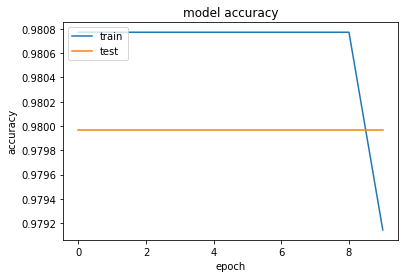

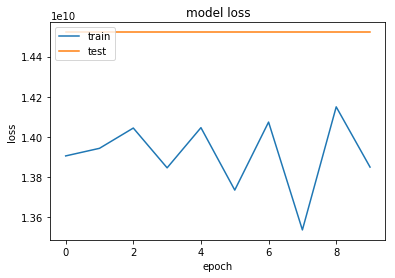

Running Fold 3 / 10
Train on 153681 samples, validate on 17075 samples
Epoch 1/10
153681/153681 [==============================] - 4s 24us/step - loss: 13670841621.1938 - acc: 0.9808 - val_loss: 13894656898.0015 - val_acc: 0.9795
Epoch 2/10
153681/153681 [==============================] - 4s 24us/step - loss: 14053865170.0726 - acc: 0.9808 - val_loss: 13894656951.7353 - val_acc: 0.0000e+00
Epoch 3/10
153681/153681 [==============================] - 4s 25us/step - loss: 13823204877.3496 - acc: 0.9792 - val_loss: 13894656898.0015 - val_acc: 0.9795
Epoch 4/10
153681/153681 [==============================] - 4s 25us/step - loss: 13714866109.1952 - acc: 0.9792 - val_loss: 13894656882.6490 - val_acc: 0.9795
Epoch 5/10
153681/153681 [==============================] - 4s 25us/step - loss: 14081063749.2451 - acc: 0.9808 - val_loss: 13894656898.0015 - val_acc: 0.9795
Epoch 6/10
153681/153681 [==============================] - 4s 25us/step - loss: 13696543554.7898 - acc: 0.9808 - val_loss: 138946

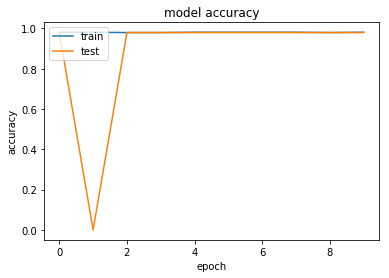

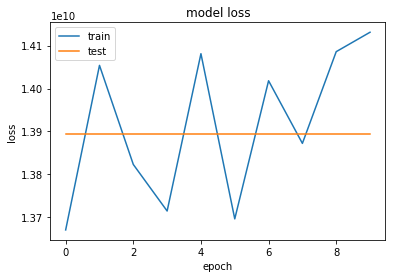

Running Fold 4 / 10
Train on 153681 samples, validate on 17075 samples
Epoch 1/10
153681/153681 [==============================] - 4s 25us/step - loss: 13960851483.0191 - acc: 0.9790 - val_loss: 14334130837.1772 - val_acc: 0.9814
Epoch 2/10
153681/153681 [==============================] - 4s 25us/step - loss: 13840097748.6062 - acc: 0.9806 - val_loss: 14334130852.5297 - val_acc: 0.9814
Epoch 3/10
153681/153681 [==============================] - 4s 25us/step - loss: 13819844189.2741 - acc: 0.9806 - val_loss: 14334130837.1772 - val_acc: 0.9814
Epoch 4/10
153681/153681 [==============================] - 4s 25us/step - loss: 13729605239.5536 - acc: 0.9806 - val_loss: 14334130837.1772 - val_acc: 0.9814
Epoch 5/10
153681/153681 [==============================] - 4s 25us/step - loss: 13935320704.2091 - acc: 0.9773 - val_loss: 14334130837.1772 - val_acc: 0.9814
Epoch 6/10
153681/153681 [==============================] - 4s 25us/step - loss: 13812817029.4763 - acc: 0.9806 - val_loss: 1433413083

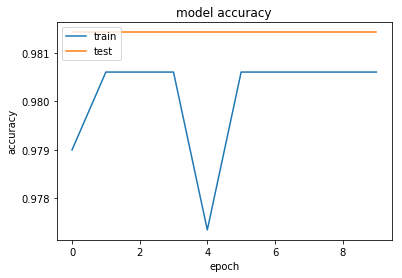

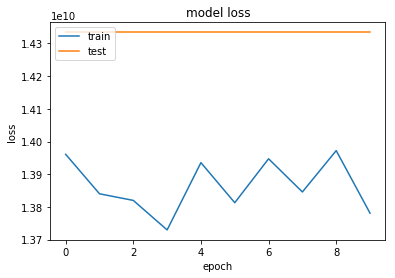

Running Fold 5 / 10
Train on 153681 samples, validate on 17075 samples
Epoch 1/10
153681/153681 [==============================] - 4s 27us/step - loss: 13751438139.2038 - acc: 0.9790 - val_loss: 14475782739.8691 - val_acc: 0.9812
Epoch 2/10
153681/153681 [==============================] - 4s 26us/step - loss: 14065971112.4462 - acc: 0.9806 - val_loss: 14475782755.2216 - val_acc: 0.9812
Epoch 3/10
153681/153681 [==============================] - 4s 28us/step - loss: 13873622795.6422 - acc: 0.9790 - val_loss: 14475782747.5453 - val_acc: 0.9812
Epoch 4/10
153681/153681 [==============================] - 4s 29us/step - loss: 14002367396.5882 - acc: 0.9806 - val_loss: 14475782755.2216 - val_acc: 0.9812
Epoch 5/10
153681/153681 [==============================] - 4s 29us/step - loss: 13926638728.0549 - acc: 0.9806 - val_loss: 14475782755.2216 - val_acc: 0.9812
Epoch 6/10
153681/153681 [==============================] - 4s 28us/step - loss: 13816218923.7153 - acc: 0.9806 - val_loss: 1447578275

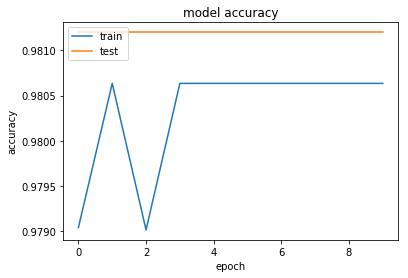

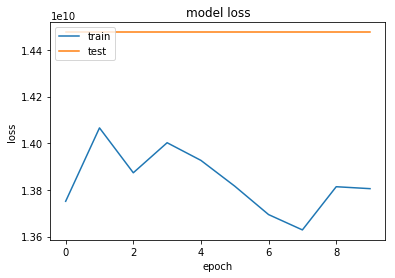

Running Fold 6 / 10
Train on 153681 samples, validate on 17075 samples
Epoch 1/10
153681/153681 [==============================] - 4s 28us/step - loss: 14035493921.3624 - acc: 0.9808 - val_loss: 13944772105.9252 - val_acc: 0.9798
Epoch 2/10
153681/153681 [==============================] - 5s 30us/step - loss: 14098880832.6909 - acc: 0.9808 - val_loss: 13944772121.2777 - val_acc: 0.9798
Epoch 3/10
153681/153681 [==============================] - 5s 30us/step - loss: 14068471950.8780 - acc: 0.9808 - val_loss: 13944772121.2777 - val_acc: 0.9798
Epoch 4/10
153681/153681 [==============================] - 4s 29us/step - loss: 14000062054.2294 - acc: 0.9791 - val_loss: 13944772121.2777 - val_acc: 0.9798
Epoch 5/10
153681/153681 [==============================] - 5s 30us/step - loss: 14017351562.5419 - acc: 0.9808 - val_loss: 13944772121.2777 - val_acc: 0.9798
Epoch 6/10
153681/153681 [==============================] - 4s 29us/step - loss: 13718456408.9664 - acc: 0.9792 - val_loss: 1394477212

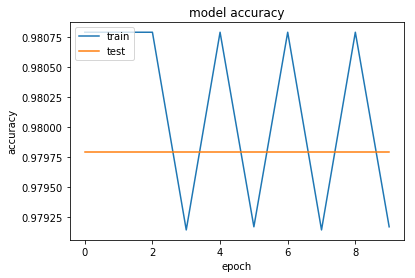

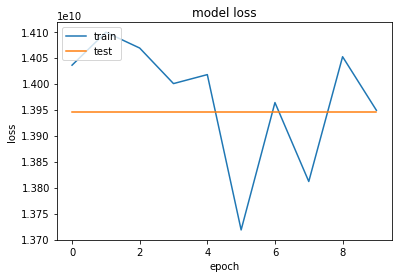

Running Fold 7 / 10
Train on 153681 samples, validate on 17075 samples
Epoch 1/10
153681/153681 [==============================] - 5s 30us/step - loss: 14088844307.7562 - acc: 0.9805 - val_loss: 14204014640.9961 - val_acc: 0.9828
Epoch 2/10
153681/153681 [==============================] - 5s 31us/step - loss: 13610032751.8177 - acc: 0.9805 - val_loss: 14204014656.3486 - val_acc: 0.9828
Epoch 3/10
153681/153681 [==============================] - 4s 29us/step - loss: 13996349522.1500 - acc: 0.9788 - val_loss: 14204014640.9961 - val_acc: 0.9828
Epoch 4/10
153681/153681 [==============================] - 4s 29us/step - loss: 13704151380.3139 - acc: 0.9805 - val_loss: 14204014687.0536 - val_acc: 0.0000e+00
Epoch 5/10
153681/153681 [==============================] - 4s 29us/step - loss: 13819533384.7483 - acc: 0.9788 - val_loss: 14204014648.6723 - val_acc: 0.9828
Epoch 6/10
153681/153681 [==============================] - 4s 28us/step - loss: 13924579219.1707 - acc: 0.9805 - val_loss: 142040

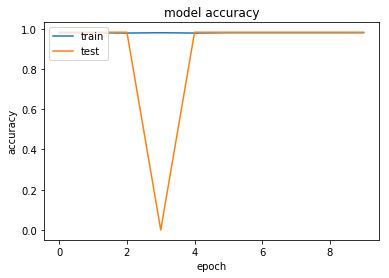

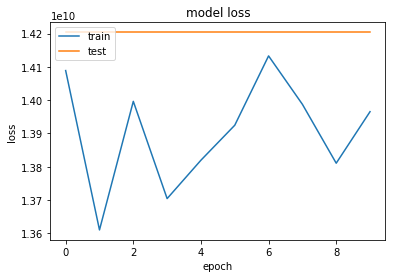

Running Fold 8 / 10
Train on 153681 samples, validate on 17075 samples
Epoch 1/10
153681/153681 [==============================] - 4s 25us/step - loss: 13978529435.0749 - acc: 0.9807 - val_loss: 13835242101.1228 - val_acc: 0.9803
Epoch 2/10
153681/153681 [==============================] - 4s 24us/step - loss: 13936625252.5503 - acc: 0.9791 - val_loss: 13835242101.1228 - val_acc: 0.9803
Epoch 3/10
153681/153681 [==============================] - 4s 24us/step - loss: 14025513603.7405 - acc: 0.9791 - val_loss: 13835242101.1228 - val_acc: 0.9803
Epoch 4/10
153681/153681 [==============================] - 4s 25us/step - loss: 13931795407.6855 - acc: 0.9791 - val_loss: 13835242101.1228 - val_acc: 0.9803
Epoch 5/10
153681/153681 [==============================] - 4s 27us/step - loss: 14082782206.3475 - acc: 0.9807 - val_loss: 13835242101.1228 - val_acc: 0.9803
Epoch 6/10
153681/153681 [==============================] - 4s 29us/step - loss: 13689346190.6448 - acc: 0.9807 - val_loss: 1383524210

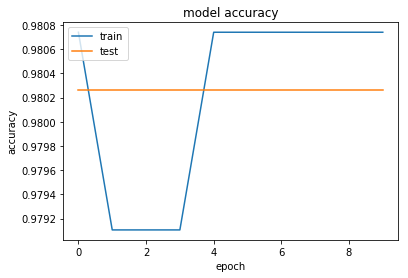

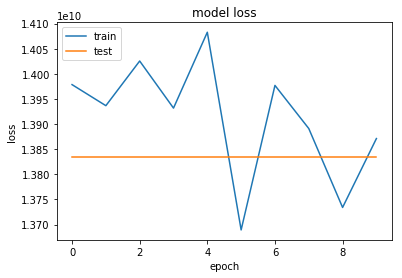

Running Fold 9 / 10
Train on 153681 samples, validate on 17075 samples
Epoch 1/10
153681/153681 [==============================] - 4s 27us/step - loss: 13933943119.1832 - acc: 0.9791 - val_loss: 14047281988.8914 - val_acc: 0.9802
Epoch 2/10
153681/153681 [==============================] - 4s 28us/step - loss: 14021922990.7745 - acc: 0.9807 - val_loss: 14047281988.8914 - val_acc: 0.9802
Epoch 3/10
153681/153681 [==============================] - 4s 29us/step - loss: 14014836210.4838 - acc: 0.9807 - val_loss: 14047281988.8914 - val_acc: 0.9802
Epoch 4/10
153681/153681 [==============================] - 5s 30us/step - loss: 13901252865.0711 - acc: 0.9807 - val_loss: 14047281988.8914 - val_acc: 0.9802
Epoch 5/10
153681/153681 [==============================] - 5s 31us/step - loss: 13929581031.5229 - acc: 0.9807 - val_loss: 14047281988.8914 - val_acc: 0.9802
Epoch 6/10
153681/153681 [==============================] - 5s 30us/step - loss: 13835864574.6307 - acc: 0.9807 - val_loss: 1404728198

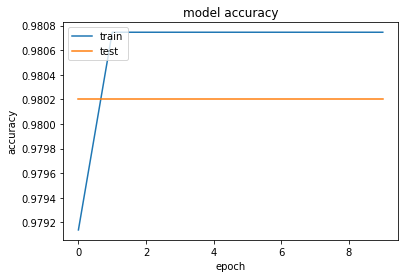

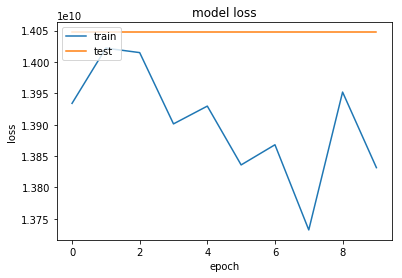

Running Fold 10 / 10
Train on 153681 samples, validate on 17075 samples
Epoch 1/10
153681/153681 [==============================] - 4s 28us/step - loss: 13871079367.5698 - acc: 0.9807 - val_loss: 14209291779.4483 - val_acc: 0.9810
Epoch 2/10
153681/153681 [==============================] - 4s 27us/step - loss: 13779207582.7546 - acc: 0.9807 - val_loss: 14209291779.4483 - val_acc: 0.9810
Epoch 3/10
153681/153681 [==============================] - 4s 28us/step - loss: 13908753387.0710 - acc: 0.9807 - val_loss: 14209291779.4483 - val_acc: 0.9810
Epoch 4/10
153681/153681 [==============================] - 5s 30us/step - loss: 14057094073.6038 - acc: 0.9807 - val_loss: 14209291779.4483 - val_acc: 0.9810
Epoch 5/10
153681/153681 [==============================] - 4s 29us/step - loss: 14021797206.1329 - acc: 0.9807 - val_loss: 14209291779.4483 - val_acc: 0.9810
Epoch 6/10
153681/153681 [==============================] - 4s 29us/step - loss: 13589072034.8808 - acc: 0.9807 - val_loss: 142092917

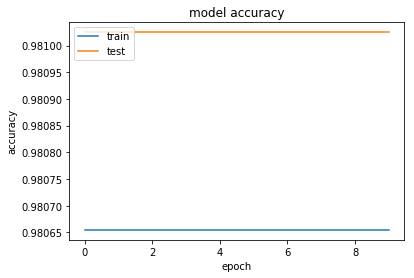

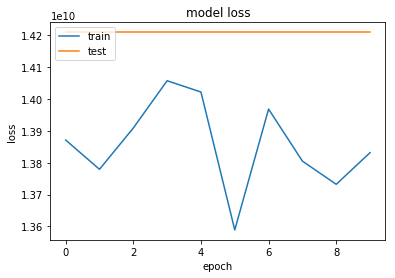

98.07% (+/- 0.09%)
42368/42690 [============================>.] - ETA: 0s

InvalidArgumentError: slice index 7 of dimension 0 out of bounds.
	 [[{{node loss_34/dense_288_loss/strided_slice_15}} = StridedSlice[Index=DT_INT32, T=DT_FLOAT, begin_mask=0, ellipsis_mask=0, end_mask=0, new_axis_mask=0, shrink_axis_mask=1, _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_dense_288_target_0_1, loss_34/dense_288_loss/strided_slice_12/stack_1, loss_34/dense_288_loss/strided_slice_14/stack_1, loss_34/dense_288_loss/strided_slice/stack_1)]]

In [41]:
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras import optimizers
import matplotlib.pyplot as plt
import keras.backend as K
from keras import losses


def my_own_loss():
        def port_loss(y_true, y_pred):
            x = K.square(y_pred - y_true)
            return K.mean(K.min(x-1,0)*x/(x-1) + K.max(x-1,0)*(2*x -1)/2/x/(x-1),axis=-1)
        
        def loss(y_true, y_pred):
            # Reconstruction loss
#             print(y_true.shape, y_pred,shape)
            sip0_loss = 4 * K.mean(K.square(y_pred[0] - y_true[0]), axis=-1)
            sip1_loss = 3 * K.mean(K.square(y_pred[1] - y_true[1]), axis=-1)
            sip2_loss = 2 * K.mean(K.square(y_pred[2] - y_true[2]), axis=-1)
            sip3_loss = K.mean(K.square(y_pred[3] - y_true[3]), axis=-1)
            
            sip_loss = sip0_loss + sip1_loss + sip2_loss + sip3_loss 

            dip0_loss = 16 * K.mean(K.square(y_pred[4] - y_true[4]), axis=-1)
            dip1_loss = 9 * K.mean(K.square(y_pred[5] - y_true[5]), axis=-1)
            dip2_loss = 4 * K.mean(K.square(y_pred[6] - y_true[6]), axis=-1)
            dip3_loss = K.mean(K.square(y_pred[7] - y_true[7]), axis=-1)
            
            dip_loss = dip0_loss + dip1_loss + dip2_loss + dip3_loss 
            
            sport_loss = K.mean(K.square(y_pred[8] - y_true[8]), axis=-1)
#             sport_loss = K.mean(K.min(x-1,0)*x/(x-1) + K.max(x-1,0)*(2*x -1)/2/x/(x-1),axis=-1)
#             sport_loss = port_loss(y_true[8],y_pred[8])
            dport_loss = 4 * K.mean(K.square(y_pred[8] - y_true[8]), axis=-1)
#             protocol_loss = K.mean(K.square(y_true[10:17]-y_pred[10:17]),axis=-1)
            protocol_loss = K.categorical_crossentropy(y_true, y_pred)
            # Full loss

            
            model_loss = protocol_loss + sip_loss + dip_loss + sport_loss + dport_loss
            return model_loss

        return loss

# def custom_loss():

#     # Create a loss function that adds the MSE loss to the mean of all squared activations of a specific layer
#     def loss(y_true,y_pred):
#         return K.mean(K.square(y_pred - y_true), axis=-1)
#     return loss
    
x_train,x_test = train_test_split(result, test_size=0.2)
print(x_train.shape, x_test.shape)

input_d = Input(shape=(17,))
encoded = Dense(14, activation='relu')(input_d)
encoded = Dense(10, activation='relu')(encoded)
encoded = Dense(6, activation='relu')(encoded)
encoded = Dense(3, activation='relu')(encoded)

decoded = Dense(6, activation='relu')(encoded)
decoded = Dense(10, activation='relu')(decoded)
decoded = Dense(14, activation='relu')(decoded)
decoded = Dense(17, activation='sigmoid')(decoded)

autoencoder = Model(input_d, decoded)
# optimizer = optimizers.SGD(lr=0.1, momentum=0.0, decay=0.1)

autoencoder.compile(optimizer='RMSprop', loss=my_own_loss(),metrics=['accuracy'])

n_folds = 10
fold_len = int(len(x_train)/n_folds)
cross_validation_scores = []
for i in range(n_folds):
    print("Running Fold", i+1, "/", n_folds)
    fold_train = [k for k in range(0,i*fold_len)] + [k for k in range((i+1)*fold_len,len(x_train))]
    fold_test = [item for item in range(i*fold_len,(i+1)*fold_len)]
    test = x_train.iloc[fold_test]
    train = x_train.iloc[fold_train]
    history = autoencoder.fit(train, train,
            epochs=10,
            batch_size=256,
            shuffle=True,
            validation_data = (test,test))
    fold_validation_score = autoencoder.evaluate(test,test,verbose=0)
    print("fold validation score = ", fold_validation_score)
    cross_validation_scores.append(fold_validation_score[1] * 100)
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

print("%.2f%% (+/- %.2f%%)" % (np.mean(cross_validation_scores), np.std(cross_validation_scores)))
    
# autoencoder.fit(x_train, x_train,
#             epochs=100,
#             batch_size=256,
#             shuffle=True,
#             validation_split = 0.2)



In [43]:
autoencoder.evaluate(x=x_test,y=x_test,verbose=0)    

InvalidArgumentError: slice index 2 of dimension 0 out of bounds.
	 [[{{node loss_34/dense_288_loss/strided_slice_5}} = StridedSlice[Index=DT_INT32, T=DT_FLOAT, begin_mask=0, ellipsis_mask=0, end_mask=0, new_axis_mask=0, shrink_axis_mask=1, _device="/job:localhost/replica:0/task:0/device:CPU:0"](_arg_dense_288_target_0_1, loss_34/dense_288_loss/strided_slice_2/stack_1, loss_34/dense_288_loss/strided_slice_4/stack_1, loss_34/dense_288_loss/strided_slice/stack_1)]]

In [ ]:
list_of_losses = []
for index, row in result.iterrows():
    input_row = np.array([result.iloc[index].values])
    loss = autoencoder.evaluate(input_row,input_row,verbose=0)
    if index%1000=0:
        print(index)
    list_of_losses.append((index,loss[1]))
print('list is ready to sort')
list_of_losses.sort(key=lambda x: x[1])
print(list_of_losses[:10])
